<a href="https://colab.research.google.com/github/harshi-collab/linear_regression_model/blob/main/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

df = pd.read_csv("/content/car_purchasing.csv",encoding="latin1")

df1=df.copy()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [24]:
df1.head(7)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549


In [3]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [4]:
df1.isna().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


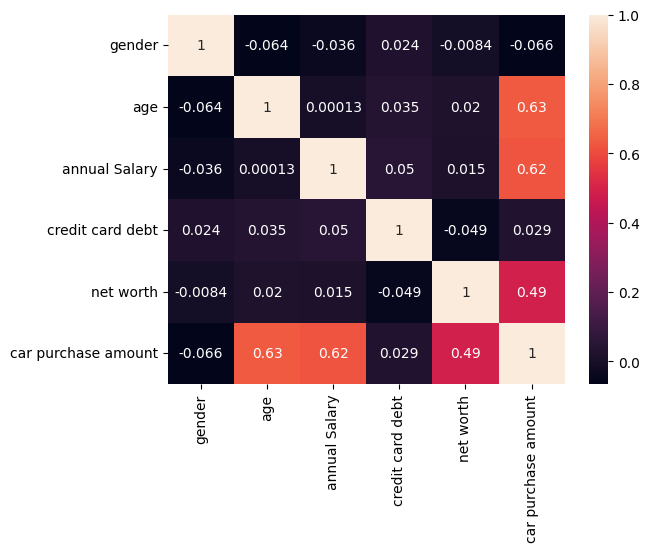

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df1=df.copy()
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

In [6]:
df1.drop(['customer name','customer e-mail', 'country', 'gender'],axis=1, inplace=True, errors='ignore')

In [7]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [8]:
import numpy as np
y=y.values.reshape(-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# y is already a 2D array from previous step, directly scale it
y = scaler.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.1,shuffle=True,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(450, 4)
(50, 4)
(450, 1)
(50, 1)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
lr_pred= lr.predict(x_test)
print(lr_pred)

[[0.52231685]
 [0.50789432]
 [0.76171373]
 [0.32166606]
 [0.72480147]
 [0.76250842]
 [0.61239342]
 [0.64447505]
 [0.61559305]
 [0.54745689]
 [0.41109552]
 [0.66520493]
 [0.49804618]
 [0.42257768]
 [0.43630547]
 [0.65033256]
 [0.56198773]
 [0.1209083 ]
 [0.72575145]
 [0.5773452 ]
 [0.45566118]
 [0.61670444]
 [0.60185947]
 [0.4090556 ]
 [0.45570511]
 [0.41185318]
 [0.77671449]
 [0.54913426]
 [0.19270561]
 [0.6090572 ]
 [0.65025438]
 [0.51914665]
 [0.45279967]
 [0.68212217]
 [0.47783412]
 [0.43509987]
 [0.74270412]
 [0.30761232]
 [0.46775238]
 [0.43796587]
 [0.68031284]
 [0.72775093]
 [0.54145481]
 [0.38927463]
 [0.62660889]
 [0.49906842]
 [0.37071495]
 [0.46886964]
 [0.60643566]
 [0.53861544]]


In [12]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,lr_pred)
print(r2)

0.9999999803460698


In [13]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,lr_pred)
print(mse)


3.9922134535627505e-10


In [14]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,lr_pred)
print(mae)

1.5643085270685697e-05


In [15]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test,lr_pred)
print(rmse)

1.9980524151189704e-05


In [16]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
ridge_pred=ridge.predict(x_test)
print(ridge_pred)

[0.51945011 0.50644779 0.74174479 0.33268795 0.70906355 0.74272148
 0.60555902 0.63310115 0.60871621 0.54177327 0.41908515 0.65238203
 0.4976066  0.42701542 0.44033768 0.63747913 0.55570695 0.15180641
 0.70829523 0.56750613 0.45781469 0.60440046 0.59434257 0.41698994
 0.46020138 0.41937342 0.75561652 0.54303594 0.2168147  0.59999
 0.63765023 0.51394768 0.45877537 0.66384929 0.48122814 0.43993815
 0.72124251 0.32242101 0.46904244 0.44273589 0.66490564 0.70902949
 0.54053302 0.39581791 0.61594406 0.49850942 0.37934646 0.47059034
 0.59461473 0.53470898]


In [17]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,ridge_pred)
print(r2)

0.993088515572063


In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,ridge_pred)
print(mse)

0.00014038983995427292


In [19]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print(lasso_pred)

[0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787]


In [20]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, lasso_pred)
print(mse)

0.022278551389895256


In [21]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,lasso_pred)
print(r2)


-0.0967877807853319


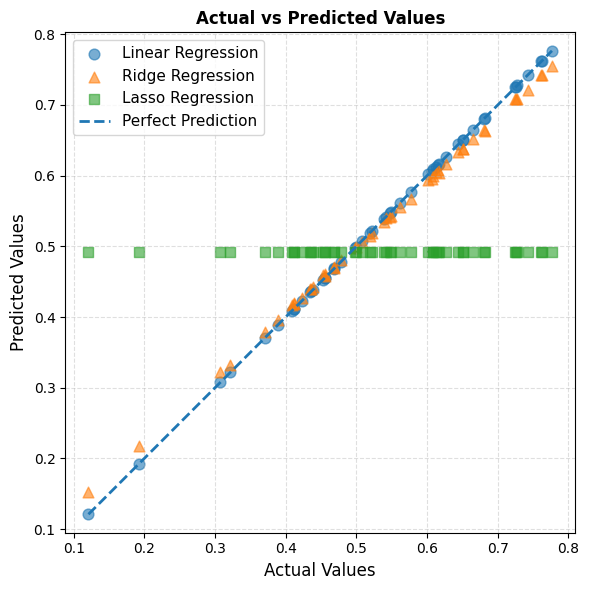

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Scatter plots with transparency and edge color
plt.scatter(y_test, lr_pred, alpha=0.6, s=60, marker='o', label='Linear Regression')
plt.scatter(y_test, ridge_pred, alpha=0.6, s=60, marker='^', label='Ridge Regression')
plt.scatter(y_test, lasso_pred, alpha=0.6, s=60, marker='s', label='Lasso Regression')

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    linewidth=2,
    label='Perfect Prediction'
)

# Labels & title
plt.title("Actual vs Predicted Values", fontsize=12, fontweight='bold')
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=11)

# Equal scaling
plt.axis('equal')

plt.tight_layout()
plt.show()
